# 문제1
제공된 pima indians diabetes.csv 데이터셋은 피마 인디언 여성들의 의료 기록과 당뇨 발병 여부를 포함하고 있습니다. 이 데이터를 활용하여 특정 개인이 당뇨에 걸릴 가능성이 있는지 여부를 예측하는 딥러닝 모델을 구축하는 것이 본 과제의 목표입니다. 데이터 전처리, 모델 설계, 학습, 평가 과정을 거쳐야 하며, 특정 요구사항들을 만족해야 합니다.


### 1-1. 데이터 전처리 및 딥러닝 모델 구축을 분류 문제 해결에 논리적이고 올바른 방법으로 설계하였다.

In [1]:
import pandas as pd

df = pd.read_csv("Data/pima indians diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Input, Activation, Dropout, BatchNormalization

X = df.drop("Outcome", axis = 1).values
Y = df["Outcome"].values

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

train_scaled.shape

(614, 8)

In [25]:
model = keras.Sequential([ 
    Input(shape = (8,)),
    
    Dense(5),  
    BatchNormalization(), 
    Activation("relu"),
    Dropout(0.3),

    Dense(2), 
    Activation("softmax")
])    

es = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

model.compile(loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"],
              optimizer = "adam")

history = model.fit(train_scaled, train_y, epochs=500,
                    validation_data=(test_scaled, test_y),
                    callbacks=[es])

Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5257 - loss: 0.9264 - val_accuracy: 0.4935 - val_loss: 0.7798
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5290 - loss: 0.8477 - val_accuracy: 0.5779 - val_loss: 0.7429
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5622 - loss: 0.7930 - val_accuracy: 0.6234 - val_loss: 0.7107
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5714 - loss: 0.7914 - val_accuracy: 0.6299 - val_loss: 0.6843
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6070 - loss: 0.7213 - val_accuracy: 0.6494 - val_loss: 0.6590
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6295 - loss: 0.7104 - val_accuracy: 0.6623 - val_loss: 0.6358
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6342 - loss: 0.6854 - val_accuracy: 0.6753 - val_loss: 0.6192
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6044 - loss: 0.6730 - val_accuracy: 0.6753 - v

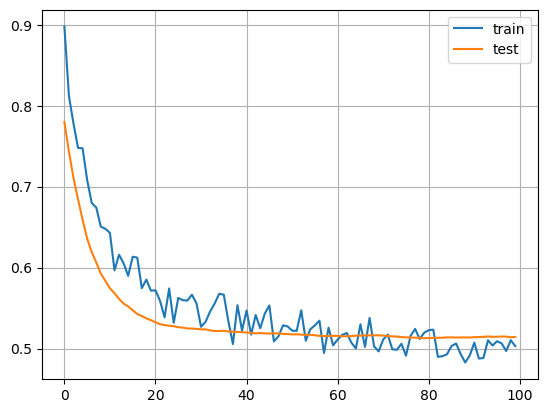

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "test"])
plt.grid()
plt.show()

### 1-2. 시험 세트의 정확도를 80% 이상 나올 수 있도록 모델을 설계하였다. (훈련세트와 시험세트의 비율은 8:2로 설정한다.) 

In [27]:
model.evaluate(test_scaled, test_y)

# 정확도: 75.97%

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7706 - loss: 0.5030 


[0.5128920078277588, 0.7597402334213257]

### 1-3. 아래 속성들을 가진 인물이 당뇨에 걸릴 가능성이 있는지 (당뇨인지, 당뇨가 아닌지) 예측하고, 그 결과를 출력하세요.

In [28]:
import numpy as np
A = np.array([[1, 136, 74, 50, 204, 37.4, 0.399, 24]])
model.predict(A)

# outcome이 0일 확률이 0%, 1일 확률이 100%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[4.2067296e-19, 1.0000000e+00]], dtype=float32)

# 문제2
제공된 boston_house_prices.csv 데이터셋은 보스턴 지역 주택의 다양한 속성 및 해당 주택 가격을 포함하고 있습니다. 이 데이터를 활용하여 특정 주택의 가격을 예측하는 딥러닝 모델을 구축하는 것이 본 과제의 목표입니다. 데이터 전처리, 모델 설계, 학습, 평가 과정을 거쳐야 하며, 특정 요구사항들을 만족해야 합니다.

### 2-1. 데이터 전처리 및 딥러닝 모델 구축을 회귀 문제 해결에 논리적이고 올바른 방법으로 설계하였다.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import pandas as pd

df = pd.read_csv("Data/boston_house_prices.csv")

X = df.drop("MEDV", axis = 1).values
Y = df["MEDV"].values

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

train_scaled.shape

(404, 13)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [34]:
from tensorflow import keras
from keras.layers import Dense, Dropout, Input, BatchNormalization, Activation

model = keras.Sequential([ 
    Input(shape = (13,)), 

    Dense(32),
    BatchNormalization(),
    Activation("relu"),

    Dense(1) 
])

model.compile(loss = "mse", optimizer="adam", metrics=["mae"]) 

es = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(train_scaled, train_y, epochs = 1000,
                   validation_data = (test_scaled, test_y),
                   callbacks = [es])

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 618.5245 - mae: 23.0131 - val_loss: 593.5931 - val_mae: 22.5308
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 554.0438 - mae: 22.1586 - val_loss: 578.8212 - val_mae: 22.2666
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 545.5447 - mae: 21.7731 - val_loss: 563.6788 - val_mae: 21.9933
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 570.4824 - mae: 22.2235 - val_loss: 548.3866 - val_mae: 21.7149
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 551.3945 - mae: 21.9184 - val_loss: 533.2407 - val_mae: 21.4357
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 526.6044 - mae: 21.4654 - val_loss: 517.9603 - val_mae: 21.1509
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 516.5019 - mae: 21.3860 - val_loss: 501.7799 - val_mae: 20.8447
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 514.4520 - mae: 20.9576 - val_loss: 486.3876 - val_mae: 20.5479
Epoch 9

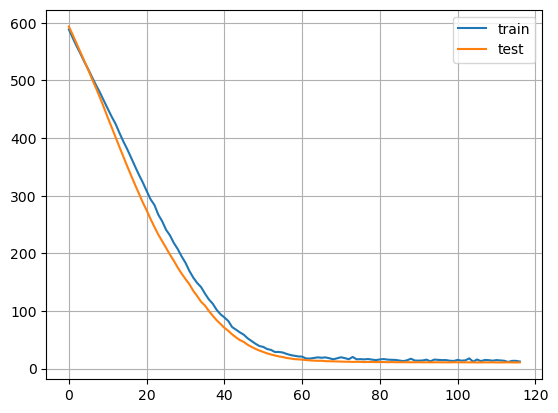

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "test"])
plt.grid()
plt.show()

### 2-2. 시험 세트에서 Mean Absolute Error (MAE)가 3.0 (단위: 1000 달러) 미만으로 나올 수 있도록 모델을 설계하였다. (훈련세트와 시험세트의 비율은 8:2로 설정한다.) 

In [47]:
model.evaluate(test_scaled, test_y)

# MAE: 2.558

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10.4430 - mae: 2.5504


[10.643229484558105, 2.5579535961151123]

### 2-3. 아래 속성을 가진 주택의 가격을 예측하고, 그 결과를 출력하세요.

In [52]:
import numpy as np
A = np.array([[0.02731, 0.0, 7.07, 0, 0.469, 6.421, 78.9, 4.9671, 2, 242, 17.8, 396.90, 9.14]])
model.predict(A)

# 예측 가격은 1778.5942

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[1778.5942]], dtype=float32)

# 문제3
MNIST 데이터셋: 28x28 픽셀 크기의 그레이스케일 손글씨 이미지 (0-9) 및 해당 이미지의 실제 숫자(레이블) 포함.    
총 70,000개의 이미지 (훈련 세트 60,000개, 시험 세트 10,000개).   
이미지 분류 모델 구축을 위한 세부 요구사항은 다음과 같습니다.

### 3-1. MNIST 손글씨 이미지 분류 문제 해결에 논리적이고 올바른 모델 구조를 설계하고 전처리 과정을 포함하였다. 

In [63]:
from tensorflow import keras
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

In [64]:
train_x.shape, test_x.shape

((60000, 28, 28), (10000, 28, 28))

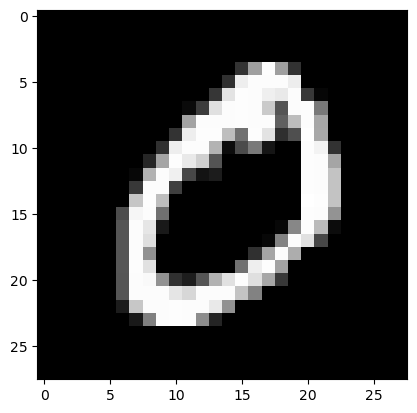

In [65]:
import matplotlib.pyplot as plt
plt.imshow(train_x[1], cmap = "gray")
plt.show()

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from tensorflow import keras
from keras.layers import Conv2D, MaxPool2D, Flatten

train_scaled = train_x.reshape(-1, 28, 28, 1) / 255          # 개수, 가로, 세로, 채널 (흑백이면 1, 컬러면 3)
test_scaled = test_x.reshape(-1, 28, 28, 1) / 255

train_scaled.shape, test_scaled.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [73]:
# CNN

model = Sequential([
    Input(shape = (28, 28, 1)),
    
    Conv2D(filters=32, kernel_size = (3,3), padding = "same"), 
    Activation("relu"),
    MaxPool2D(pool_size = (2,2)),
    
    Conv2D(filters=32, kernel_size = (3,3), padding = "same"), 
    Activation("relu"),
    MaxPool2D(pool_size = (2,2)), 

    Flatten(),

    Dense(256),      
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.3), 

    Dense(128),       
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.3), 

    Dense(10),
    Activation("softmax")
])

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 256)                 │         401,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_22 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_23 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_24 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 446,954 (1.70 MB)

 Trainable params: 446,186 (1.70 MB)

 Non-trainable params: 768 (3.00 KB)

In [74]:
model.compile(loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = 'adam')

es = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(train_scaled, train_y, epochs = 500,
                    validation_data=(test_scaled, test_y),
                    callbacks=[es])

Epoch 1/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9082 - loss: 0.3065 - val_accuracy: 0.9811 - val_loss: 0.0609
Epoch 2/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9789 - loss: 0.0698 - val_accuracy: 0.9794 - val_loss: 0.0582
Epoch 3/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9840 - loss: 0.0533 - val_accuracy: 0.9895 - val_loss: 0.0313
Epoch 4/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9876 - loss: 0.0405 - val_accuracy: 0.9883 - val_loss: 0.0369
Epoch 5/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9889 - loss: 0.0344 - val_accuracy: 0.9903 - val_loss: 0.0255
Epoch 6/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9907 - loss: 0.0267 - val_accuracy: 0.9903 - val_loss: 0.0284
Epoch 7/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9925 - loss: 0.0241 - val_accuracy: 0.9916 - val_loss: 0.0250
Epoch 8/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.

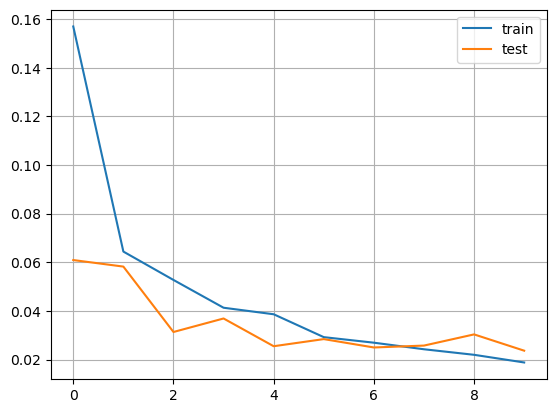

In [75]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"][:-5]) 
plt.plot(history.history["val_loss"][:-5])
plt.legend(["train", "test"])
plt.grid()
plt.show()

### 3-2. 시험 세트에서 98% 이상의 정확도(Accuracy)를 달성하도록 모델을 설계하고 학습하였다. 

In [76]:
model.evaluate(test_scaled, test_y)

# 정확도 99.28%

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9911 - loss: 0.0289


[0.023652976378798485, 0.9927999973297119]

# 문제 4
제공되는 IMDB 영화 리뷰 데이터셋은 영화 리뷰 텍스트 및 해당 리뷰의 감성(긍정 또는 부정) 레이블을 포함하고 있습니다. 이 데이터를 활용하여 새로운 영화 리뷰 텍스트의 감성을 예측하는 딥러닝 모델을 구축하는 것이 본 과제의 목표입니다. 텍스트 데이터 전처리, 모델 설계, 학습, 평가, 예측 과정을 거쳐야 하며, 특정 요구사항들을 만족해야 합니다.

### 4-1. IMDB 영화 리뷰 텍스트 감성 분류 문제 해결을 위해 텍스트 데이터 전처리  및 논리적이고 올바른 딥러닝 모델 구조를 설계하였다.

In [186]:
from tensorflow import keras
(train_x, train_y), (test_x, test_y) = keras.datasets.imdb.load_data(num_words=500)

In [187]:
train_x.shape, test_x.shape

((25000,), (25000,))

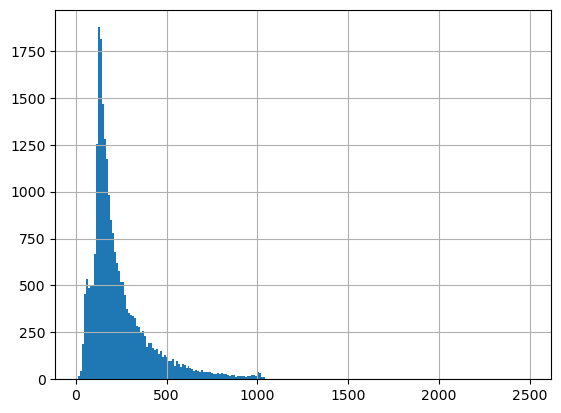

In [114]:
box = []
for i in train_x:
    box.append(len(i))       # 각 사람이 리뷰에 사용한 단어의 개수

plt.hist(box, bins = "auto")
plt.grid()
plt.show()

In [188]:
from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_x, 500, padding="pre", truncating="pre") 
test_seq = pad_sequences(test_x, 500, padding="pre", truncating="pre")  

In [189]:
train_seq.shape

(25000, 500)

In [190]:
train_y.shape

(25000,)

In [191]:
from keras.layers import Embedding

model = keras.Sequential([
    Input(shape = (500, )), 
    Embedding(input_dim = 500, output_dim = 100),  
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(loss = "binary_crossentropy",  
              optimizer="adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)             │ (None, 500, 100)            │          50,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_42 (Dropout)                 │ (None, 500, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 64)                  │          42,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,305 (360.57 KB)

 Trainable params: 92,305 (360.57 KB)

 Non-trainable params: 0 (0.00 B)

### 4-2. 시험 세트에서 80% 이상의 정확도(Accuracy)를 달성하도록 모델을 설계하고 학습하였다. 

In [121]:
es = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(train_seq, train_y, epochs = 10,
                   validation_data=(test_seq, test_y))
                   callbacks = [es])

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 174s 221ms/step - accuracy: 0.6376 - loss: 0.6291 - val_accuracy: 0.7716 - val_loss: 0.4938
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 210s 268ms/step - accuracy: 0.7483 - loss: 0.5259 - val_accuracy: 0.7114 - val_loss: 0.5588
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 199s 254ms/step - accuracy: 0.7570 - loss: 0.5074 - val_accuracy: 0.8208 - val_loss: 0.4193
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 200s 256ms/step - accuracy: 0.8189 - loss: 0.4104 - val_accuracy: 0.8385 - val_loss: 0.3676
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 204s 260ms/step - accuracy: 0.8433 - loss: 0.3694 - val_accuracy: 0.8507 - val_loss: 0.3417
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 205s 263ms/step - accuracy: 0.8535 - loss: 0.3459 - val_accuracy: 0.8558 - val_loss: 0.3359
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 188s 241ms/step - accuracy: 0.8602 - loss: 0.3289 - val_accuracy: 0.8548 - val_loss: 0.3346
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 180s 231ms/step - accuracy: 0.8660 -

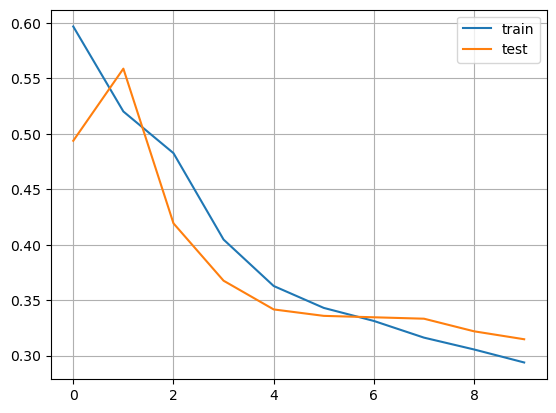

In [122]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "test"])
plt.grid()
plt.show()

In [194]:
from tensorflow import keras
(train_x, train_y), (test_x, test_y) = keras.datasets.imdb.load_data()

In [183]:
train_x[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [184]:
train_x.shape, test_x.shape

((25000,), (25000,))

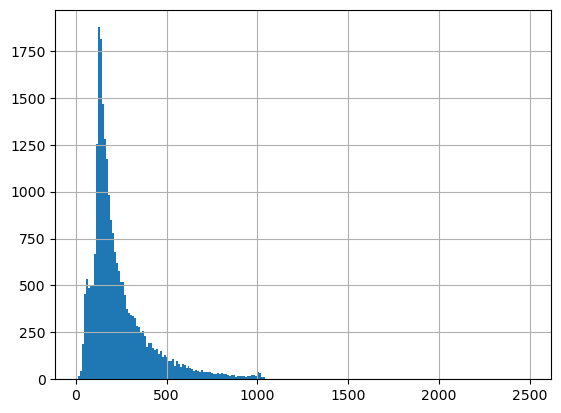

In [185]:
box = []
for i in train_x:
    box.append(len(i))       # 각 사람이 리뷰에 사용한 단어의 개수

plt.hist(box, bins = "auto")
plt.grid()
plt.show()

In [195]:
from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_x, 500, padding="pre", truncating="pre") 
test_seq = pad_sequences(test_x, 500, padding="pre", truncating="pre")  

In [196]:
train_seq.shape

(25000, 500)

In [197]:
train_y.shape

(25000,)

In [202]:
from keras.layers import Embedding

model = keras.Sequential([
    Input(shape = (500, )), 
    Embedding(input_dim = 100000 , output_dim = 100),  
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(loss = "binary_crossentropy",  
              optimizer="adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)             │ (None, 500, 100)            │      10,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_48 (Dropout)                 │ (None, 500, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 64)                  │          42,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,042,305 (38.31 MB)

 Trainable params: 10,042,305 (38.31 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
es = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(train_seq, train_y, epochs = 10,
                   validation_data=(test_seq, test_y),
                   callbacks = [es])

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 205s 260ms/step - accuracy: 0.7270 - loss: 0.5159 - val_accuracy: 0.8342 - val_loss: 0.3872
Epoch 2/10
171/782 ━━━━━━━━━━━━━━━━━━━━ 2:18 226ms/step - accuracy: 0.9262 - loss: 0.2141

In [ ]:
model.evaluate(test_scaled, test_y)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "test"])
plt.grid()
plt.show()

# 문제 5
제공되는 `삼성전자 주가 데이터셋`은 특정 기간 동안의 일별 주가 정보(시가, 고가, 저가, 종가, 거래량, 변화율)를 포함하고 있습니다. 이 데이터를 활용하여 과거 주가 특성을 기반으로 다음 영업일의 종가가 1% 이상 상승할지 여부를 예측하는 딥러닝 분류 모델을 구축하는 것이 본 과제의 목표입니다. 데이터 전처리, 특징(Feature) 및 목표 변수(Label) 정의, 모델 설계, 학습, 평가, 그리고 마지막 날짜 기준 다음 날 예측 과정을 거쳐야 하며, 특정 요구사항들을 만족해야 합니다.

### 5-1. 제공된 삼성전자 주가 데이터를 로드하고, 시계열 데이터를 고려하여 과거 주가 특성을 독립변수 X로, 다음 날 종가 기준 1% 이상 상승 여부를 판단하여 종속변수 Y (True/False 또는 1/0)로 정의하며, 모델 학습을 위한 데이터 전처리 및 논리적인 딥러닝 분류 모델 구조를 설계하였다. (10점)

In [140]:
df = pd.read_csv("Data/samsung (1).csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.dropna()
df = df.set_index("Date")
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2013-02-21,30799,31160,30700,31000,262473,0.003236
2013-02-22,30600,30959,30400,30600,277053,-0.012903
2013-02-25,30980,30980,30600,30600,177951,0.000000
2013-02-26,30300,30760,30159,30540,184895,-0.001961
2013-02-27,31180,31180,30380,30540,178764,0.000000
...,...,...,...,...,...,...
2025-04-30,55900,56000,55300,55500,13014189,-0.005376
2025-05-02,55000,55500,54200,54300,22454204,-0.021622
2025-05-07,54500,55000,54300,54600,17136991,0.005525


In [141]:
import warnings
warnings.filterwarnings('ignore')

df["Pred"] = df["Close"].shift(-1)
for i in range(0, 2998):
    df["Pred"].iloc[i] = 0
    if df["Close"].iloc[i+1] >= df["Close"].iloc[i]*1.01:
        df["Pred"].iloc[i] = 1

### 5-2. 데이터를 훈련 세트와 시험 세트로 분할(8:2 비율)하고, 모델을 학습시키며, 분류 모델의 성능을 평가하기 위한 적절한 지표(예: 정확도, 정밀도, 재현율)를 사용하여 모델의 성능을 확인하였다.

In [170]:
X = df[:2998].drop("Pred", axis = 1).values
Y = df[:2998]["Pred"].values

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

In [171]:
train_scaled.shape

(2398, 6)

In [172]:
from keras.models import Sequential
from keras.layers import Dense, Input, Activation, Dropout, BatchNormalization   
from tensorflow import keras

model = keras.Sequential([  
    Input(shape = (6,)),  
    
    Dense(8), 
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.3), 

    Dense(2), 
    Activation("softmax")
])    

model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                     │ (None, 8)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_36 (Activation)           │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 2)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_37 (Activation)           │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 106 (424.00 B)

 Trainable params: 90 (360.00 B)

 Non-trainable params: 16 (64.00 B)

In [173]:
es = keras.callbacks.EarlyStopping(patience=10, restore_best_weights = True)

model.compile(loss = "sparse_categorical_crossentropy", 
              metrics = ["accuracy"],
              optimizer = "adam")

history = model.fit(train_scaled, train_y, epochs=500, 
                    validation_data=(test_scaled, test_y),
                    callbacks = [es])

Epoch 1/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5663 - loss: 0.7450 - val_accuracy: 0.6783 - val_loss: 0.6351
Epoch 2/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6588 - loss: 0.6830 - val_accuracy: 0.7250 - val_loss: 0.5939
Epoch 3/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7225 - loss: 0.6143 - val_accuracy: 0.7550 - val_loss: 0.5745
Epoch 4/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7482 - loss: 0.5777 - val_accuracy: 0.7650 - val_loss: 0.5598
Epoch 5/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7550 - loss: 0.5805 - val_accuracy: 0.7667 - val_loss: 0.5546
Epoch 6/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7609 - loss: 0.5706 - val_accuracy: 0.7683 - val_loss: 0.5508
Epoch 7/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7585 - loss: 0.5648 - val_accuracy: 0.7683 - val_loss: 0.5473
Epoch 8/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7721 - loss: 0.5528 - val_accuracy: 0.7683 - v

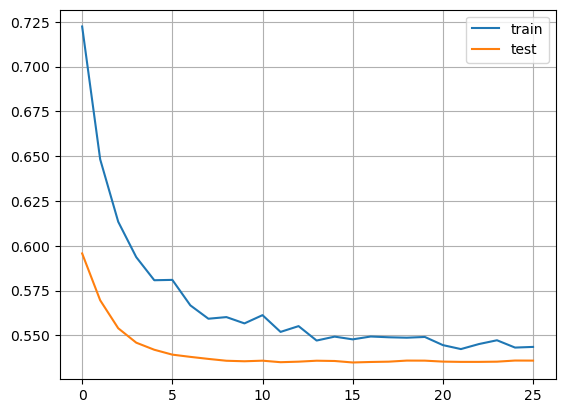

In [167]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])          # 학습은 잘되었으나
plt.plot(history.history["val_loss"])       # 쉬운 모델에 복잡한 딥러닝 모델 사용해서 과대적합 빨리 발생함
plt.legend(["train", "test"])
plt.grid()
plt.show()

In [168]:
model.evaluate(test_scaled, test_y)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7717 - loss: 0.5328 


[0.5348262786865234, 0.7699999809265137]

In [169]:
from sklearn.metrics import classification_report
pred = np.argmax(model.predict(test_scaled), axis = 1)
report = classification_report(test_y, pred)
print(report)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87       462
         1.0       0.00      0.00      0.00       138

    accuracy                           0.77       600
   macro avg       0.39      0.50      0.44       600
weighted avg       0.59      0.77      0.67       600



### 5-3. 학습된 모델을 사용하여 데이터셋에 포함된 가장 최신 날짜의 데이터를 기반으로 다음 영업일(2025년 5월 10일)의 주가가 1% 이상 상승할지 안 할지 예측하고, 그 예측 결과(True 또는 False)를 명확하게 출력하였다. 

In [178]:
np.array(df[2998:])

array([[5.47000000e+04, 5.50000000e+04, 5.44000000e+04, 5.48000000e+04,
        7.44182000e+06, 3.66300366e-03,            nan]])

In [180]:
import numpy as np
A = np.array([[5.47000000e+04, 5.50000000e+04, 5.44000000e+04, 5.48000000e+04, 7.44182000e+06, 3.66300366e-03]])
model.predict(A)

# 2025년 5월 9일에 대해 다음날 종가 기준 1% 이상 상승 여부가 0일 확률이 100%, 1일 확률이 0%
# 즉, 다음 영업일의 주가가 1% 이상 상승하지 않을 것으로 예측된다

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([[1., 0.]], dtype=float32)